In [1]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import drive
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/base de dados/dataset_balanceado_limpo.csv', encoding='utf-8', sep=',')

Mounted at /content/drive


In [3]:
def normalize_dataframe(df):
    for coluna in df.columns:
        if df[coluna].dtype != 'category':
            max_valor = df[coluna].max()
            df[coluna] = df[coluna] / max_valor

In [4]:
labels = df[' Label']

data = df.drop(columns=[' Label'])

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [5]:
data = data.drop(columns=['Bwd Avg Bulk Rate', ' Flow Packets/s', ' Bwd Avg Packets/Bulk', ' Bwd Avg Bytes/Bulk', ' Fwd Avg Bulk Rate', ' Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', ' ECE Flag Count', ' PSH Flag Count', 'FIN Flag Count', ' Bwd URG Flags', ' Fwd URG Flags', ' Bwd PSH Flags'], axis=1)
indices_selecionados = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 32, 34, 35, 36, 37, 38, 41, 43, 44, 47, 55, 56, 58, 66, 67]
data = data.iloc[:, indices_selecionados]

In [6]:
normalize_dataframe(data)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

clf = HistGradientBoostingClassifier(max_iter=100, random_state=42, verbose=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy}')

Binning 0.127 GB of training data: 1.949 s
Binning 0.014 GB of validation data: 0.081 s
Fitting gradient boosted rounds:
[1/100] 7 trees, 217 leaves (31 on avg), max depth = 15, train loss: 1.33402, val loss: 1.33505, in 1.364s
[2/100] 7 trees, 217 leaves (31 on avg), max depth = 16, train loss: 1.06236, val loss: 1.06382, in 0.757s
[3/100] 7 trees, 217 leaves (31 on avg), max depth = 16, train loss: 0.87547, val loss: 0.87724, in 0.765s
[4/100] 7 trees, 217 leaves (31 on avg), max depth = 17, train loss: 0.73733, val loss: 0.73935, in 0.804s
[5/100] 7 trees, 217 leaves (31 on avg), max depth = 18, train loss: 0.63141, val loss: 0.63361, in 1.278s
[6/100] 7 trees, 217 leaves (31 on avg), max depth = 15, train loss: 0.54844, val loss: 0.55074, in 5.896s
[7/100] 7 trees, 217 leaves (31 on avg), max depth = 15, train loss: 0.48251, val loss: 0.48497, in 1.034s
[8/100] 7 trees, 217 leaves (31 on avg), max depth = 16, train loss: 0.42920, val loss: 0.43185, in 1.027s
[9/100] 7 trees, 217 le

In [ ]:
num_folds = 10

clf = HistGradientBoostingClassifier(max_iter=100, random_state=42, verbose=1)

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

scores = cross_val_score(clf, data, labels_encoded, cv=kf, scoring='accuracy')

print(f'Acurácia para cada fold: {scores}')
print(f'Acurácia média: {np.mean(scores)}')

Binning 0.120 GB of training data: 5.347 s
Binning 0.013 GB of validation data: 0.085 s
Fitting gradient boosted rounds:
[1/100] 6 trees, 186 leaves (31 on avg), max depth = 12, train loss: 1.26249, val loss: 1.26254, in 0.644s
[2/100] 6 trees, 186 leaves (31 on avg), max depth = 12, train loss: 1.01934, val loss: 1.01953, in 0.722s
[3/100] 6 trees, 186 leaves (31 on avg), max depth = 14, train loss: 0.84892, val loss: 0.84910, in 0.752s
[4/100] 6 trees, 186 leaves (31 on avg), max depth = 12, train loss: 0.72202, val loss: 0.72224, in 0.770s
[5/100] 6 trees, 186 leaves (31 on avg), max depth = 12, train loss: 0.62428, val loss: 0.62451, in 0.702s
[6/100] 6 trees, 186 leaves (31 on avg), max depth = 13, train loss: 0.54755, val loss: 0.54777, in 0.677s
[7/100] 6 trees, 186 leaves (31 on avg), max depth = 13, train loss: 0.48630, val loss: 0.48652, in 0.769s
[8/100] 6 trees, 186 leaves (31 on avg), max depth = 13, train loss: 0.43712, val loss: 0.43733, in 0.749s
[9/100] 6 trees, 186 le

Matriz de Confusão:
[[ 5778     0     0     1     0     2     0]
 [    0 19921    13     1     0     0     0]
 [    0     5 19968     0     4     0   116]
 [    0     1     1  9932 10062     2     0]
 [    0     1     2  2120 17964     5     1]
 [    0     0     1     0     5 19813    10]
 [    0     0   238     0     1    10 19738]]


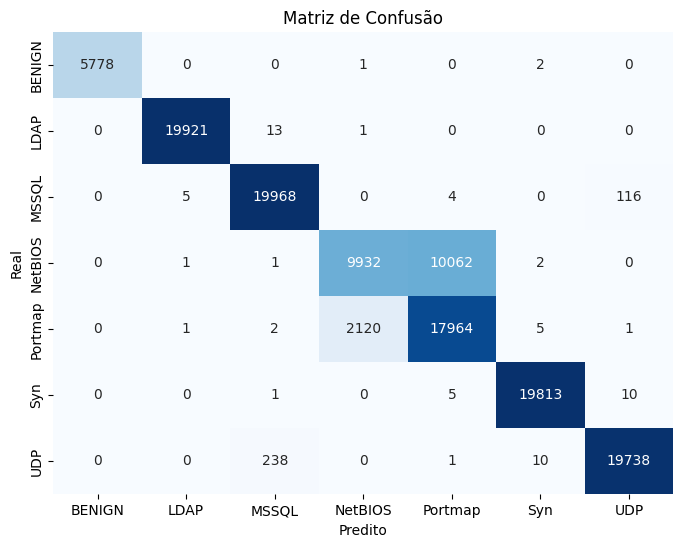

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
unique_values, counts = np.unique(y_test, return_counts=True)

contagem_por_classe = dict(zip(unique_values, counts))

porcentagem_por_classe = {classe: (conf_matrix[i, i] / contagem_por_classe[classe]) * 100
                           for i, classe in enumerate(unique_values)}

print("Porcentagem de acertos por classe:")
print(porcentagem_por_classe)

Porcentagem de acertos por classe:
{0: 99.94810586403736, 1: 99.92977175821419, 2: 99.37789279848704, 3: 49.66496649664967, 4: 89.40427014383118, 5: 99.91931010136669, 6: 98.75419022364537}


In [ ]:
drive.mount('/content/drive')
df_teste = pd.read_csv('/content/drive/MyDrive/base de dados/dataset_teste.csv', encoding='utf-8', sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
contagem_por_classe = df_teste[' Label'].value_counts()

print("Contagem de exemplares por classe:")
print(contagem_por_classe)

Contagem de exemplares por classe:
MSSQL      114054
Syn         99978
NetBIOS     99908
Portmap     95273
UDP         73970
LDAP         9931
BENIGN       6886
Name:  Label, dtype: int64


In [ ]:
labels_teste = df_teste[' Label']

data_teste = df_teste.drop(columns=[' Label'])

label_encoder = LabelEncoder()
labels_encoded_teste = label_encoder.fit_transform(labels_teste)

In [ ]:
data_teste = data_teste.drop(columns=['Bwd Avg Bulk Rate', ' Flow Packets/s', ' Bwd Avg Packets/Bulk', ' Bwd Avg Bytes/Bulk', ' Fwd Avg Bulk Rate', ' Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', ' ECE Flag Count', ' PSH Flag Count', 'FIN Flag Count', ' Bwd URG Flags', ' Fwd URG Flags', ' Bwd PSH Flags'], axis=1)
indices_selecionados = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 32, 34, 35, 36, 37, 38, 41, 43, 44, 47, 55, 56, 58, 66, 67]
data_teste = data_teste.iloc[:, indices_selecionados]

In [ ]:
normalize_dataframe(data_teste)

<ipython-input-13-629f5b553942>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = df[coluna] / max_valor  # Divide todos os valores da coluna pelo máximo


In [ ]:
y_pred_teste = clf.predict(data_teste)

accuracy = accuracy_score(labels_encoded_teste, y_pred_teste)
print(f'Accuracy on Test Set: {accuracy}')

Accuracy on Test Set: 0.849682


Matriz de Confusão:
[[ 5778     0     0     1     0     2     0]
 [    0 19921    13     1     0     0     0]
 [    0     5 19968     0     4     0   116]
 [    0     1     1  9932 10062     2     0]
 [    0     1     2  2120 17964     5     1]
 [    0     0     1     0     5 19813    10]
 [    0     0   238     0     1    10 19738]]


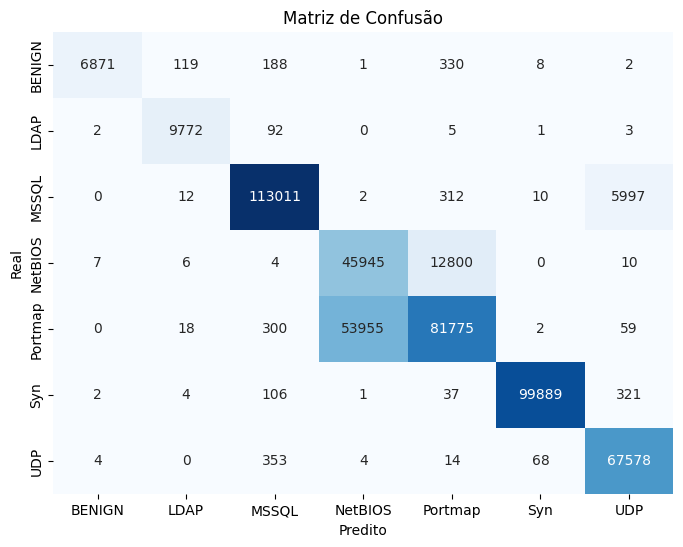

In [ ]:
conf_matrix_teste = confusion_matrix(y_pred_teste, labels_encoded_teste,)

print("Matriz de Confusão:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_teste, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
unique_values, counts = np.unique(y_pred_teste, return_counts=True)

print(unique_values)
print(counts)

[0 1 2 3 4 5 6]
[  7519   9875 119344  58772 136109 100360  68021]


In [ ]:
unique_values, counts = np.unique(y_pred_teste, return_counts=True)

contagem_por_classe = dict(zip(unique_values, counts))

porcentagem_por_classe = {classe: (conf_matrix_teste[i, i] / contagem_por_classe[classe]) * 100
                           for i, classe in enumerate(unique_values)}

print("Porcentagem de acertos por classe:")
print(porcentagem_por_classe)

Porcentagem de acertos por classe:
{0: 91.38183269051736, 1: 98.95696202531646, 2: 94.69349108459579, 3: 78.17498128360444, 4: 60.08052369791857, 5: 99.53068951773615, 6: 99.34873053909821}


#importancia features

In [9]:
perm_importance = permutation_importance(clf, data, labels_encoded)

print("Importância das features:")
for i in range(data.shape[1]):
    print(f"Feature {i}: {perm_importance.importances_mean[i]}")

Importância das features:
Feature 0: 0.27209852110166477
Feature 1: 0.012807997760016333
Feature 2: 0.00010245380033602203
Feature 3: 0.001772896197118623
Feature 4: 0.029983009214478495
Feature 5: 0.001003538156086181
Feature 6: 0.06369730947411296
Feature 7: 0.019051634169933364
Feature 8: 0.015987247365473745
Feature 9: 0.008417438782263443
Feature 10: 0.001836850277452573
Feature 11: 0.0008565392251693282
Feature 12: 0.00010818103141072566
Feature 13: 0.0009093570228580594
Feature 14: 0.0013710354833783357
Feature 15: 0.0005972229292878107
Feature 16: 0.0013522628926335711
Feature 17: 0.00022940742249151215
Feature 18: 0.0013815354070152441
Feature 19: 4.263605355603328e-05
Feature 20: 0.02544608766481702
Feature 21: 0.001392035330652175
Feature 22: 0.00043208776663445915
Feature 23: 0.04471058392302605
Feature 24: 0.13283898844372047
Feature 25: 0.09453431247772748
Feature 26: 4.772692562238223e-05
Feature 27: 7.190856793772848e-05
Feature 28: 0.0002399073461284207
Feature 29: 0.0

In [10]:
# Lista as colunas presentes no DataFrame
colunas = data.columns

# Exibe as colunas
print("Colunas no DataFrame:")
print(colunas)

Colunas no DataFrame:
Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Flow Bytes/s',
       ' Flow IAT Mean', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Total', ' Fwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' SYN Flag Count', ' ACK Flag Count',
       ' URG Flag Count', ' Average Packet Size', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' min_seg_size_forward', ' Idle Min',
       ' Inbound'],
      dtype='object')
